<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/Distribuci%C3%B3n_Triangular_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las sig librerias:
import numpy as np #Para el cálculo numérico
import random # Para cargar el módulo aleatorio
import matplotlib.pyplot as plt #Para la creación de gráficos y visualizaciones de datos

In [ ]:
# Definimos los parámetros de la distribución triangular
a = 1
b = 3
c = 5

In [ ]:
# Función de densidad triangular
def f(x):
  #definimos la parte izquierda del triangulo
    if a <= x <= b:
        return 2 * (x - a) / ((c - a) * (b - a)) #parte de la funcion para el intervalo (a <= x <= b)
        #definimos la parte derecha del triangulo
    elif b < x <= c:
        return 2 * (c - x) / ((c - a) * (c - b)) #parte de la funcion para el intervalo (b < x <= c)
    else:
        return 0

In [ ]:
# Definimos M como 2/(c-a) , que es el maximo de la funcion max=f(b), si lo despejamos se obtiene M
M = 2/(c-a)

In [ ]:
def generar_triangular(n_muestras):
    muestras = [] #Cramos una lista vacia
    n_aceptadas = 0
    n_intentos = 0

    while n_aceptadas < n_muestras:
        # Paso 1: Generar dos números aleatorios R1 y R2 uniformes en [0,1]
        R1 = np.random.random()
        R2 = np.random.random()

        # Paso 2: Determinar x con la forma x = a + (c-a) * R1
        x = a + (c - a) * R1

        # Paso 3: Evaluar f en x
        fx = f(x)

        # Paso 4: Si R2 <= f(x)/M se acepta x, si no se cumple se rechaza x
        if R2 <= fx / M:
            muestras.append(x)
            n_aceptadas += 1

        n_intentos += 1

    eficiencia = n_aceptadas / n_intentos
    return np.array(muestras), eficiencia

In [ ]:
# Generar muestras
n_muestras = 10000
muestras, eficiencia = generar_triangular(n_muestras)

In [ ]:
# Calcular estadísticas
media_empirica = np.mean(muestras) #Calculo de la media
desv_est_empirica = np.std(muestras) #Calculo de la desviacion estandar

In [ ]:
print(f"Eficiencia: {eficiencia}")
print(f"Media empírica: {media_empirica}")
print(f"Desviación estándar empírica: {desv_est_empirica}")

Eficiencia: 0.506482982171799
Media empírica: 2.996084924400431
Desviación estándar empírica: 0.813895339809405


In [ ]:
# Calcular valores teóricos
# Media teórica para distribución triangular: (a + b + c) / 3
media_teorica = (a + b + c) / 3
# Desviación estándar teórica: sqrt((a^2 + b^2 + c^2 - a*b - a*c - b*c) / 18)
desv_est_teorica = np.sqrt((a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18)

In [ ]:
print(f"Media teórica: {media_teorica}")
print(f"Desviación estándar teórica: {desv_est_teorica}")

Media teórica: 3.0
Desviación estándar teórica: 0.816496580927726


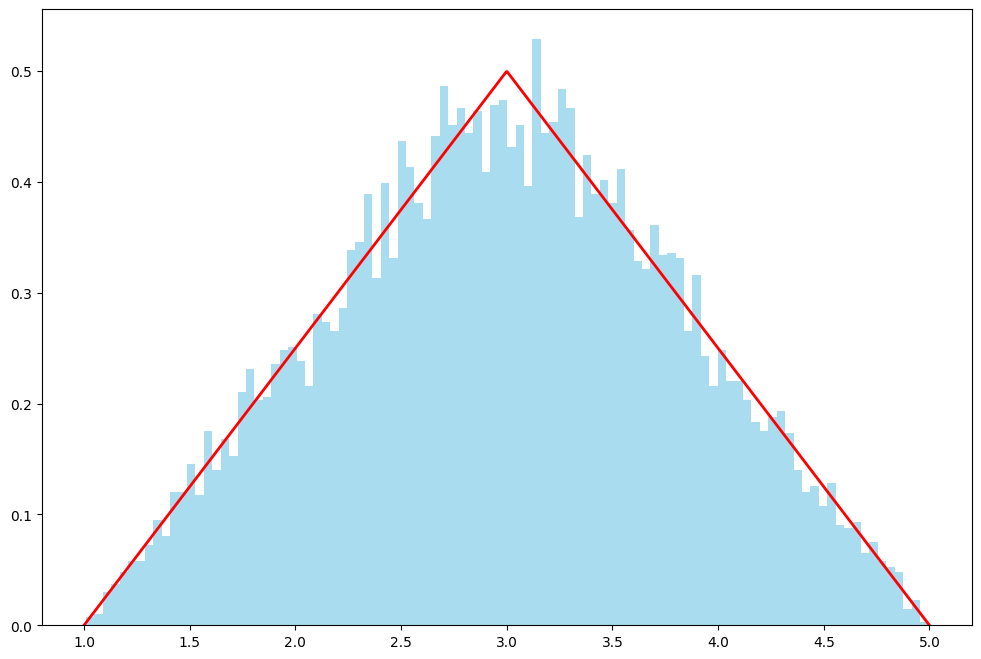

In [ ]:
# Crear el gráfico
plt.figure(figsize=(12, 8))

# Histograma de las muestras generadas
plt.hist(muestras, bins=100, density=True, alpha=0.7, color='skyblue', label='Muestras generadas')

# Curva teórica de la distribución triangular
x_range = np.linspace(a, c, 1000)
y_vals = [f(x) for x in x_range]
plt.plot(x_range, y_vals, 'r-', lw=2, label='Función de densidad teórica')

